In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')

In [2]:
# Read coverage per base file and add column names to the file
head = ["chr", "start", "end", "feature", "base", "sample"]
df = pd.read_csv("./Var1.pbcov",
                 sep="\t", names=head)
df.head()

,chr,start,end,feature,base,sample
0,11,7507038,7507306,olfml1-e1,1,14
1,11,7507038,7507306,olfml1-e1,2,14
2,11,7507038,7507306,olfml1-e1,3,14
3,11,7507038,7507306,olfml1-e1,4,14
4,11,7507038,7507306,olfml1-e1,5,14


In [3]:
gene_list = []
for gene in list(df["feature"]):
    gene_list.append(gene.split("-")[0])
    
df["gene"] = gene_list
df.head()

,chr,start,end,feature,base,sample,gene
0,11,7507038,7507306,olfml1-e1,1,14,olfml1
1,11,7507038,7507306,olfml1-e1,2,14,olfml1
2,11,7507038,7507306,olfml1-e1,3,14,olfml1
3,11,7507038,7507306,olfml1-e1,4,14,olfml1
4,11,7507038,7507306,olfml1-e1,5,14,olfml1


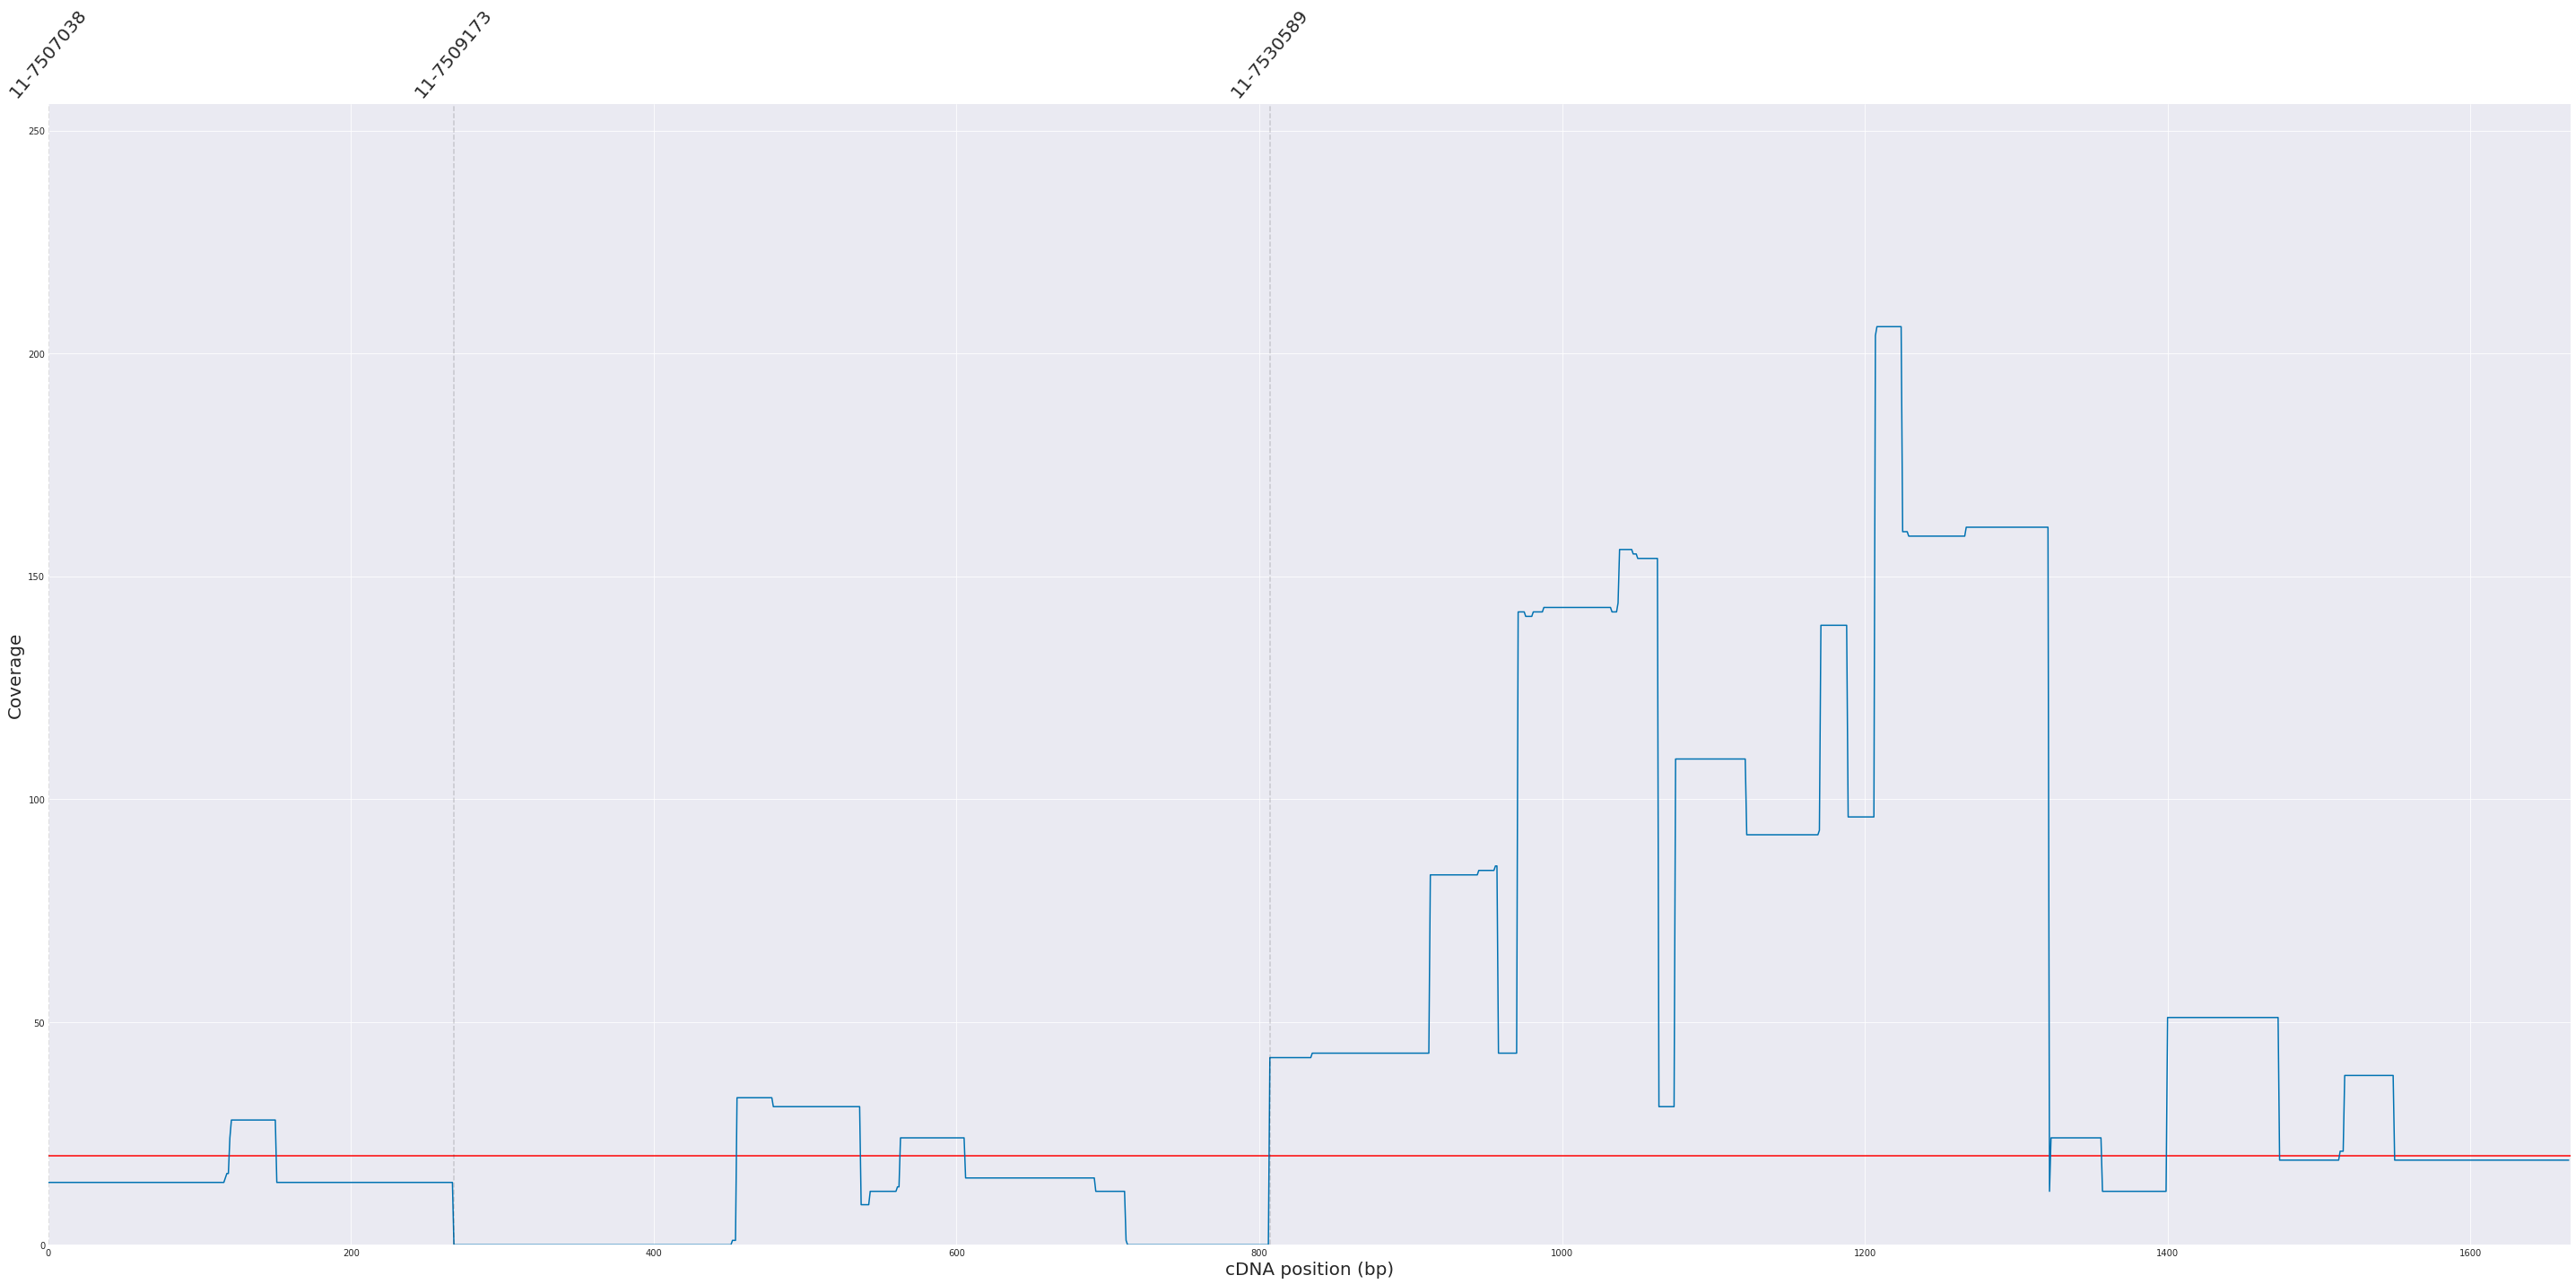

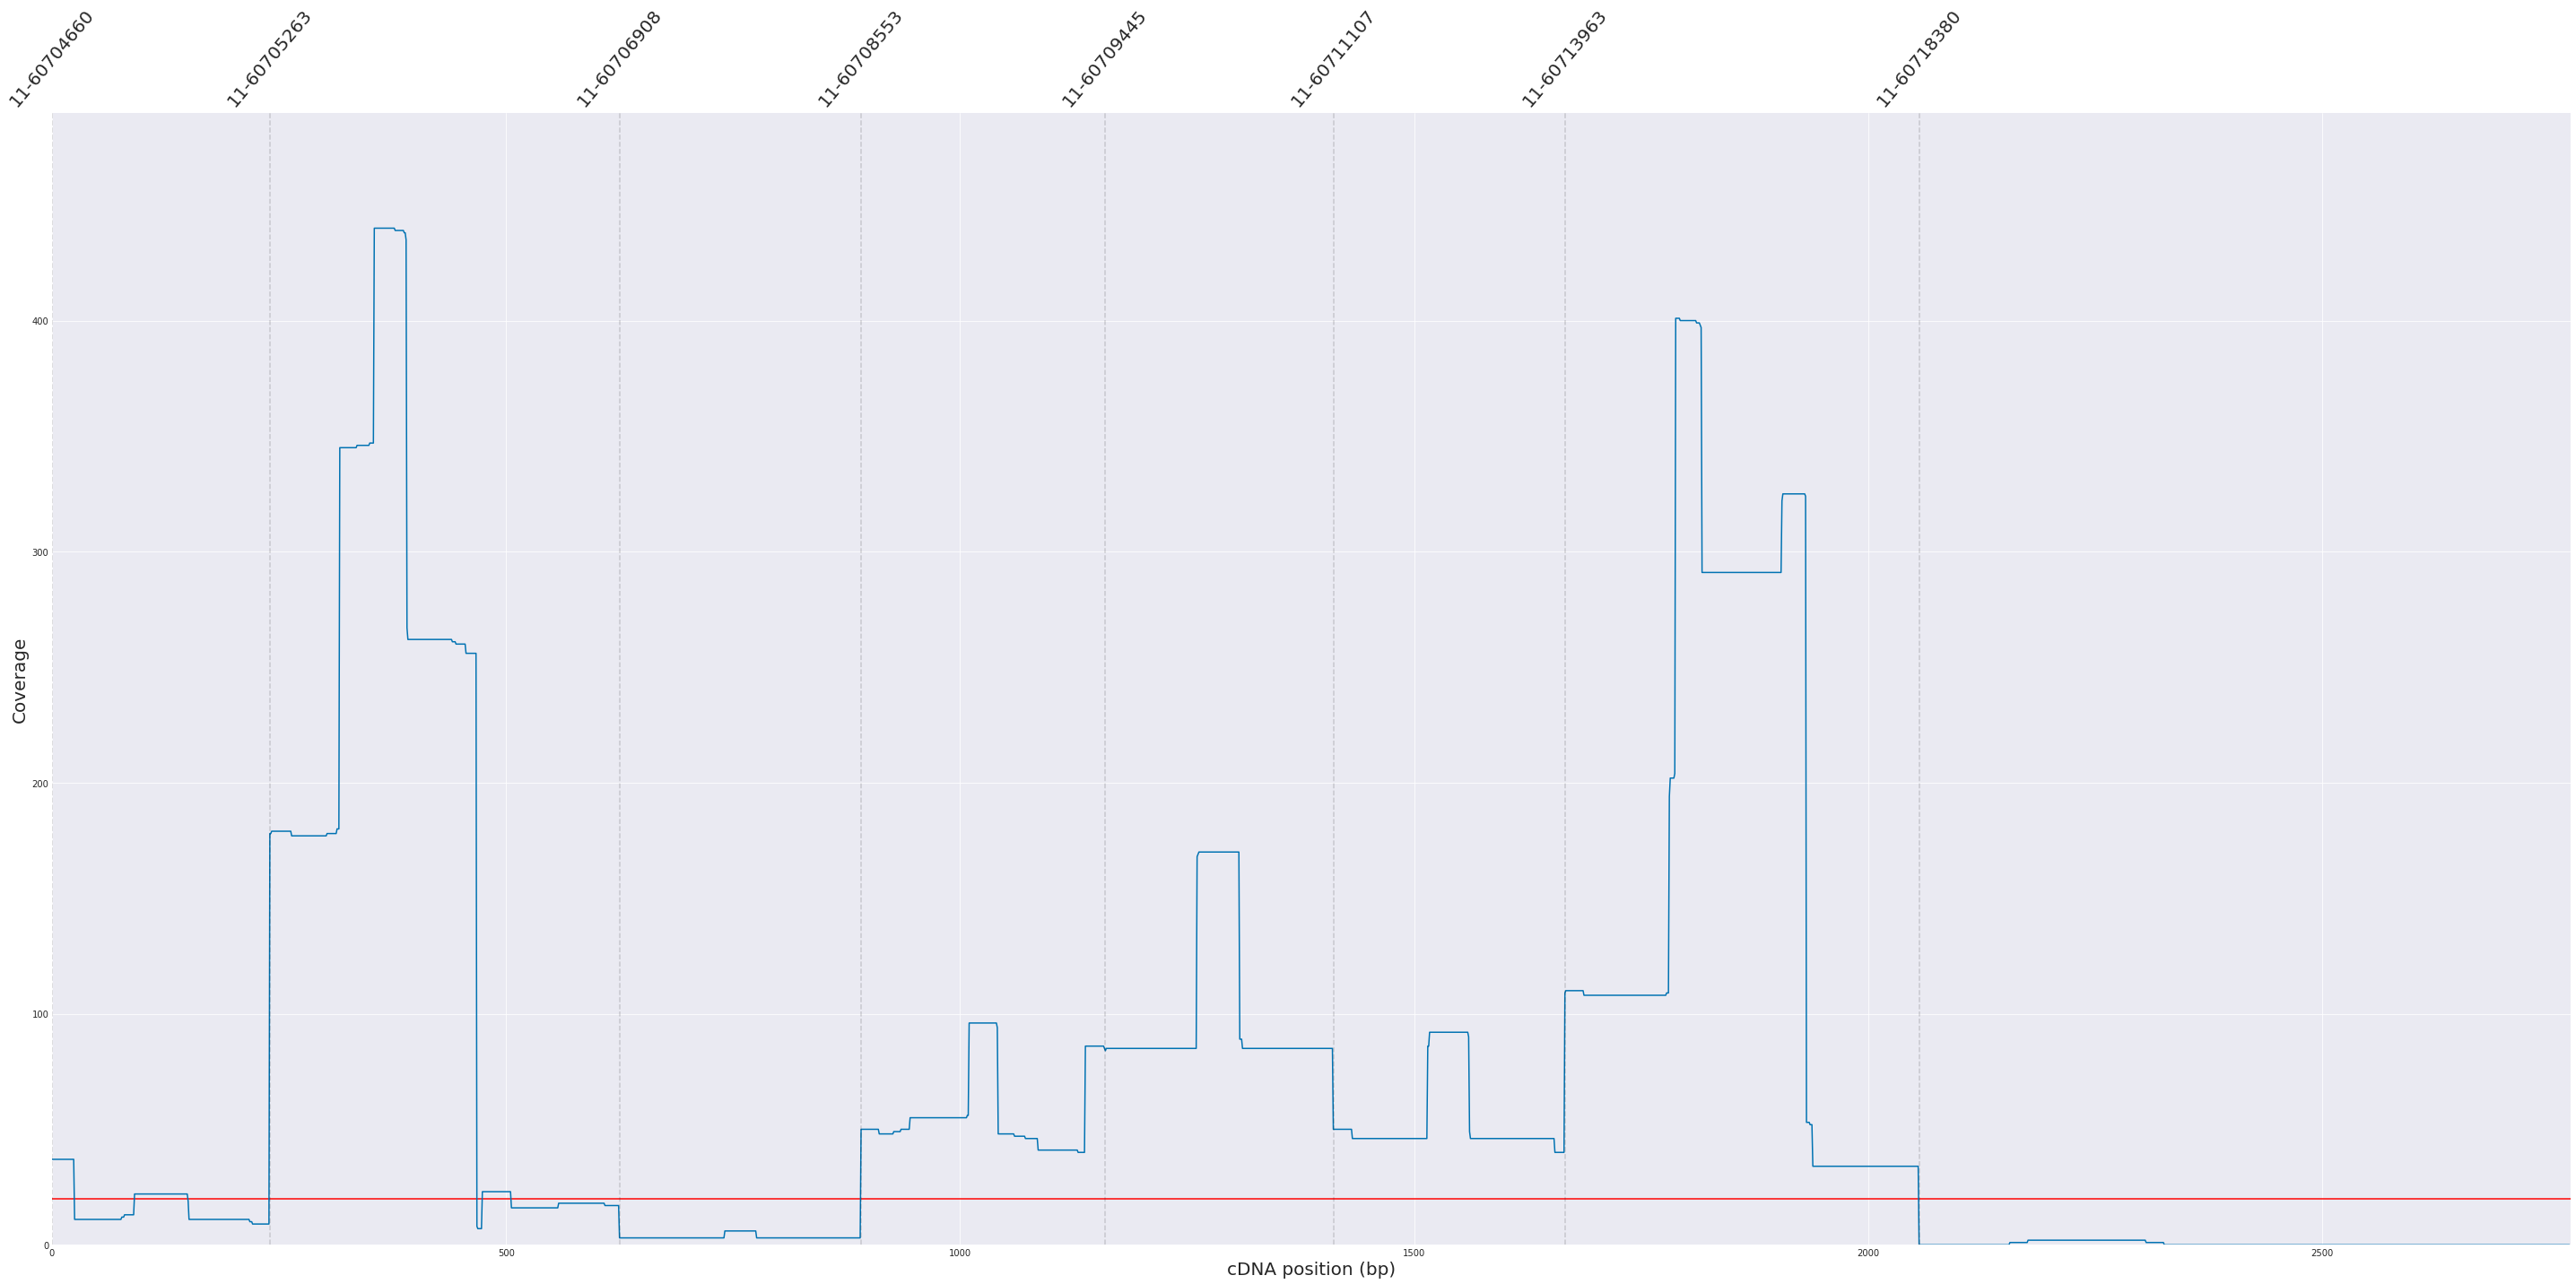

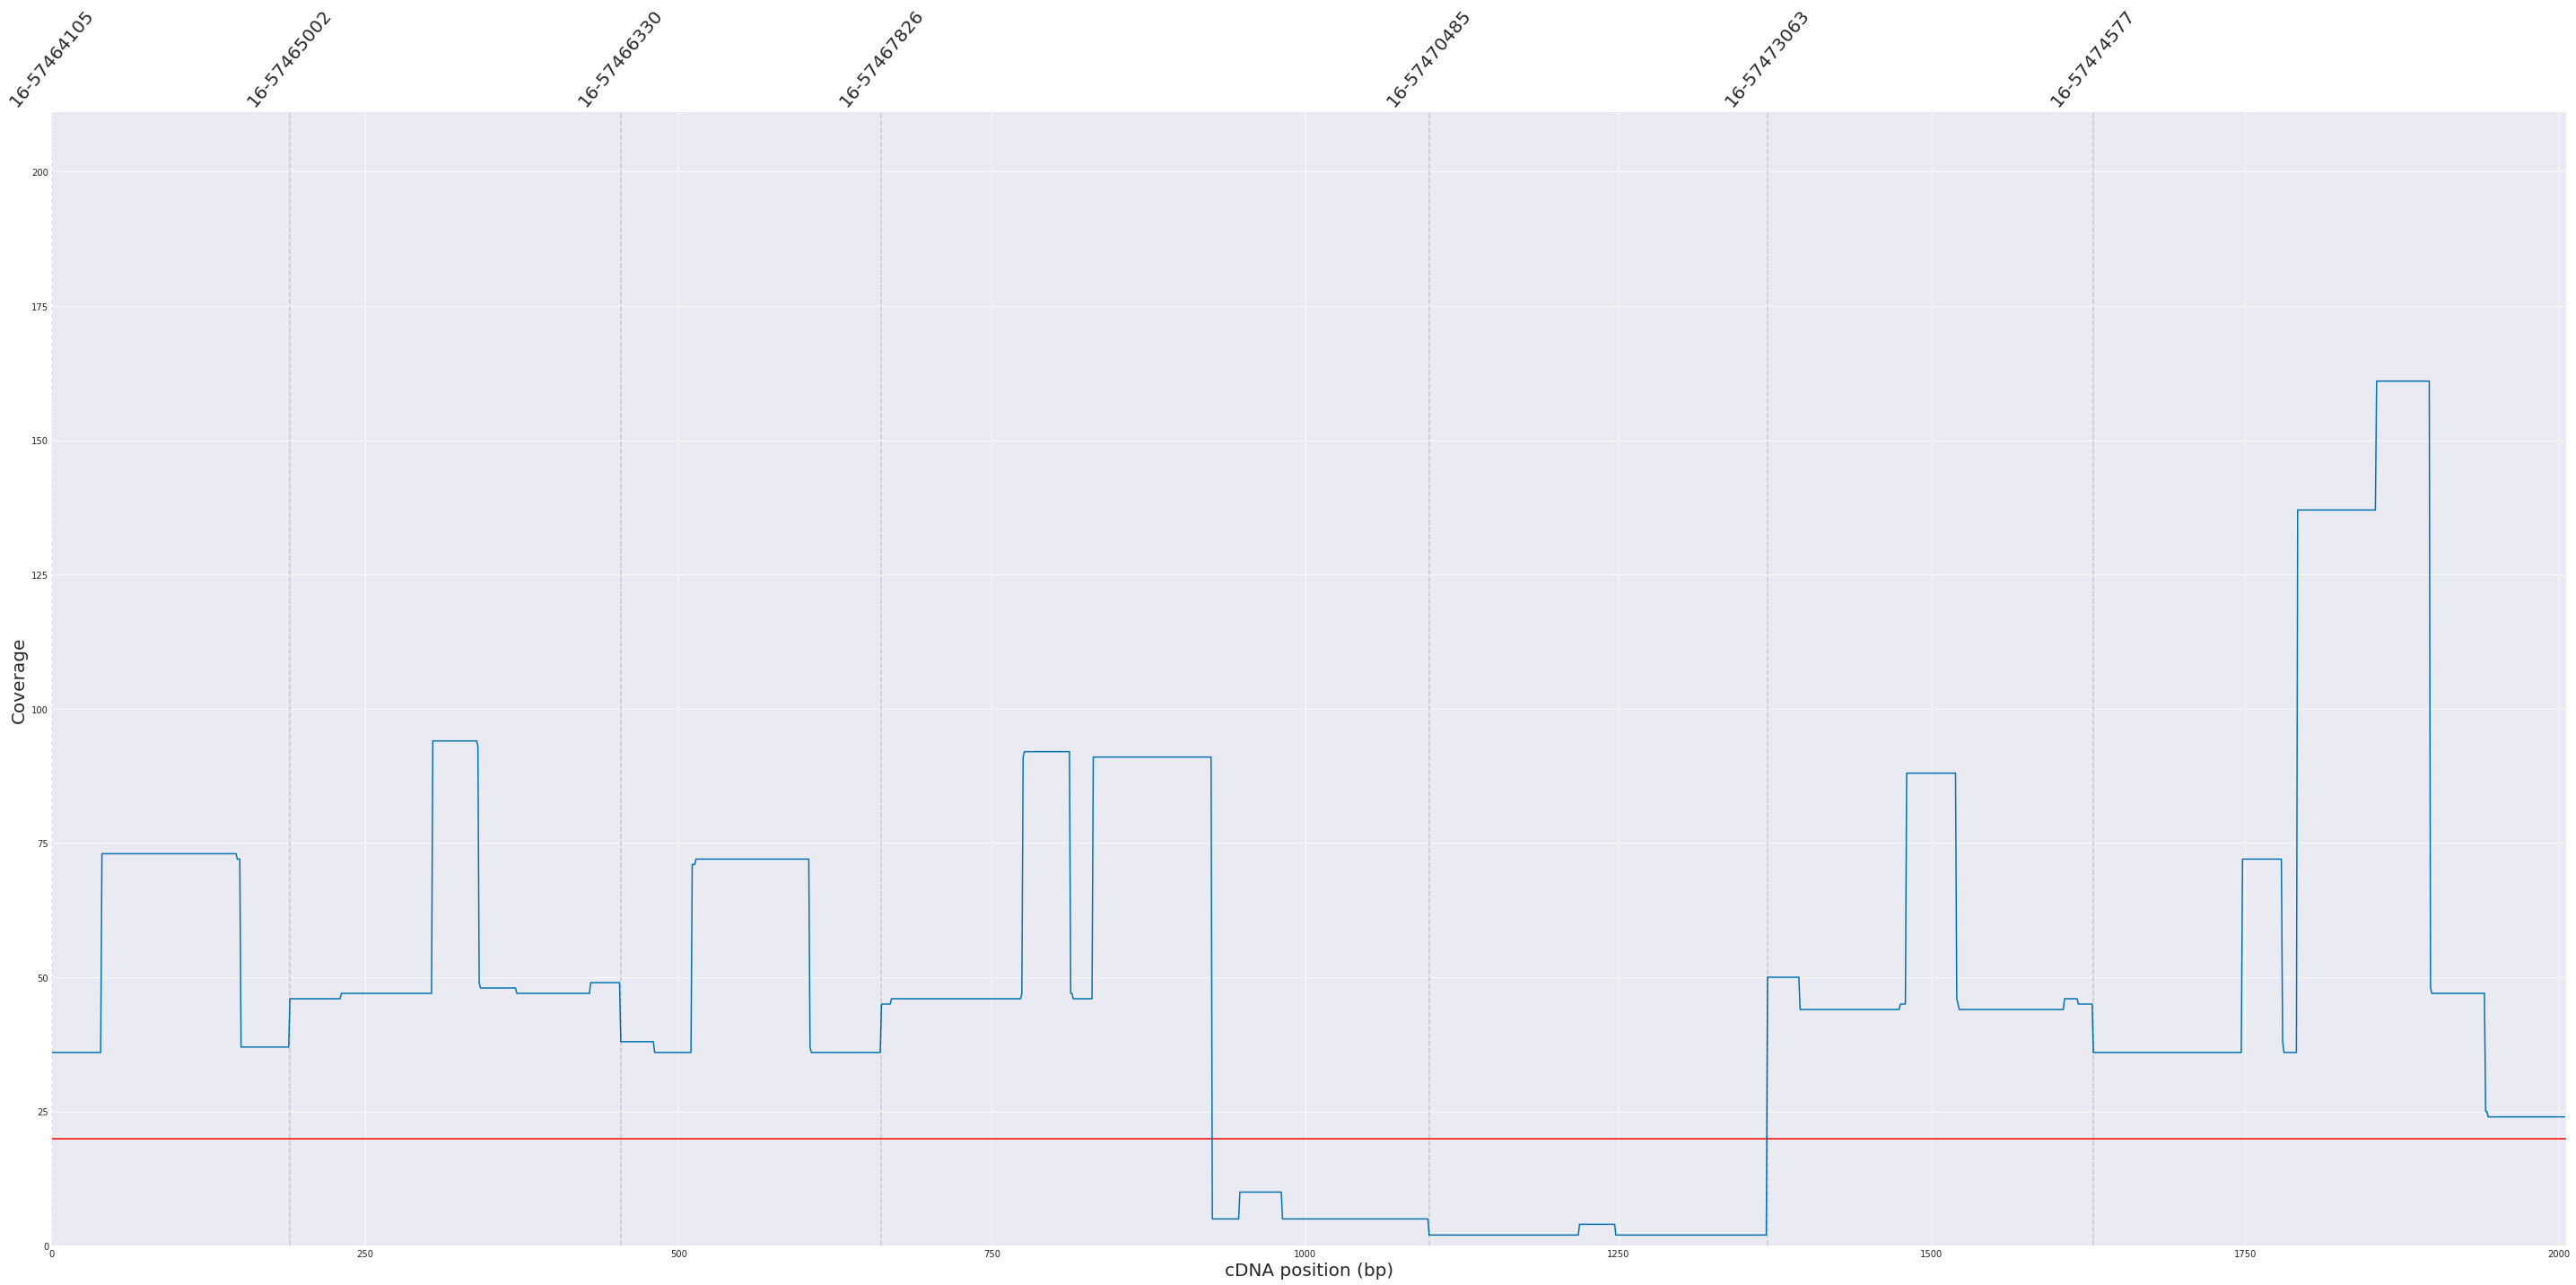

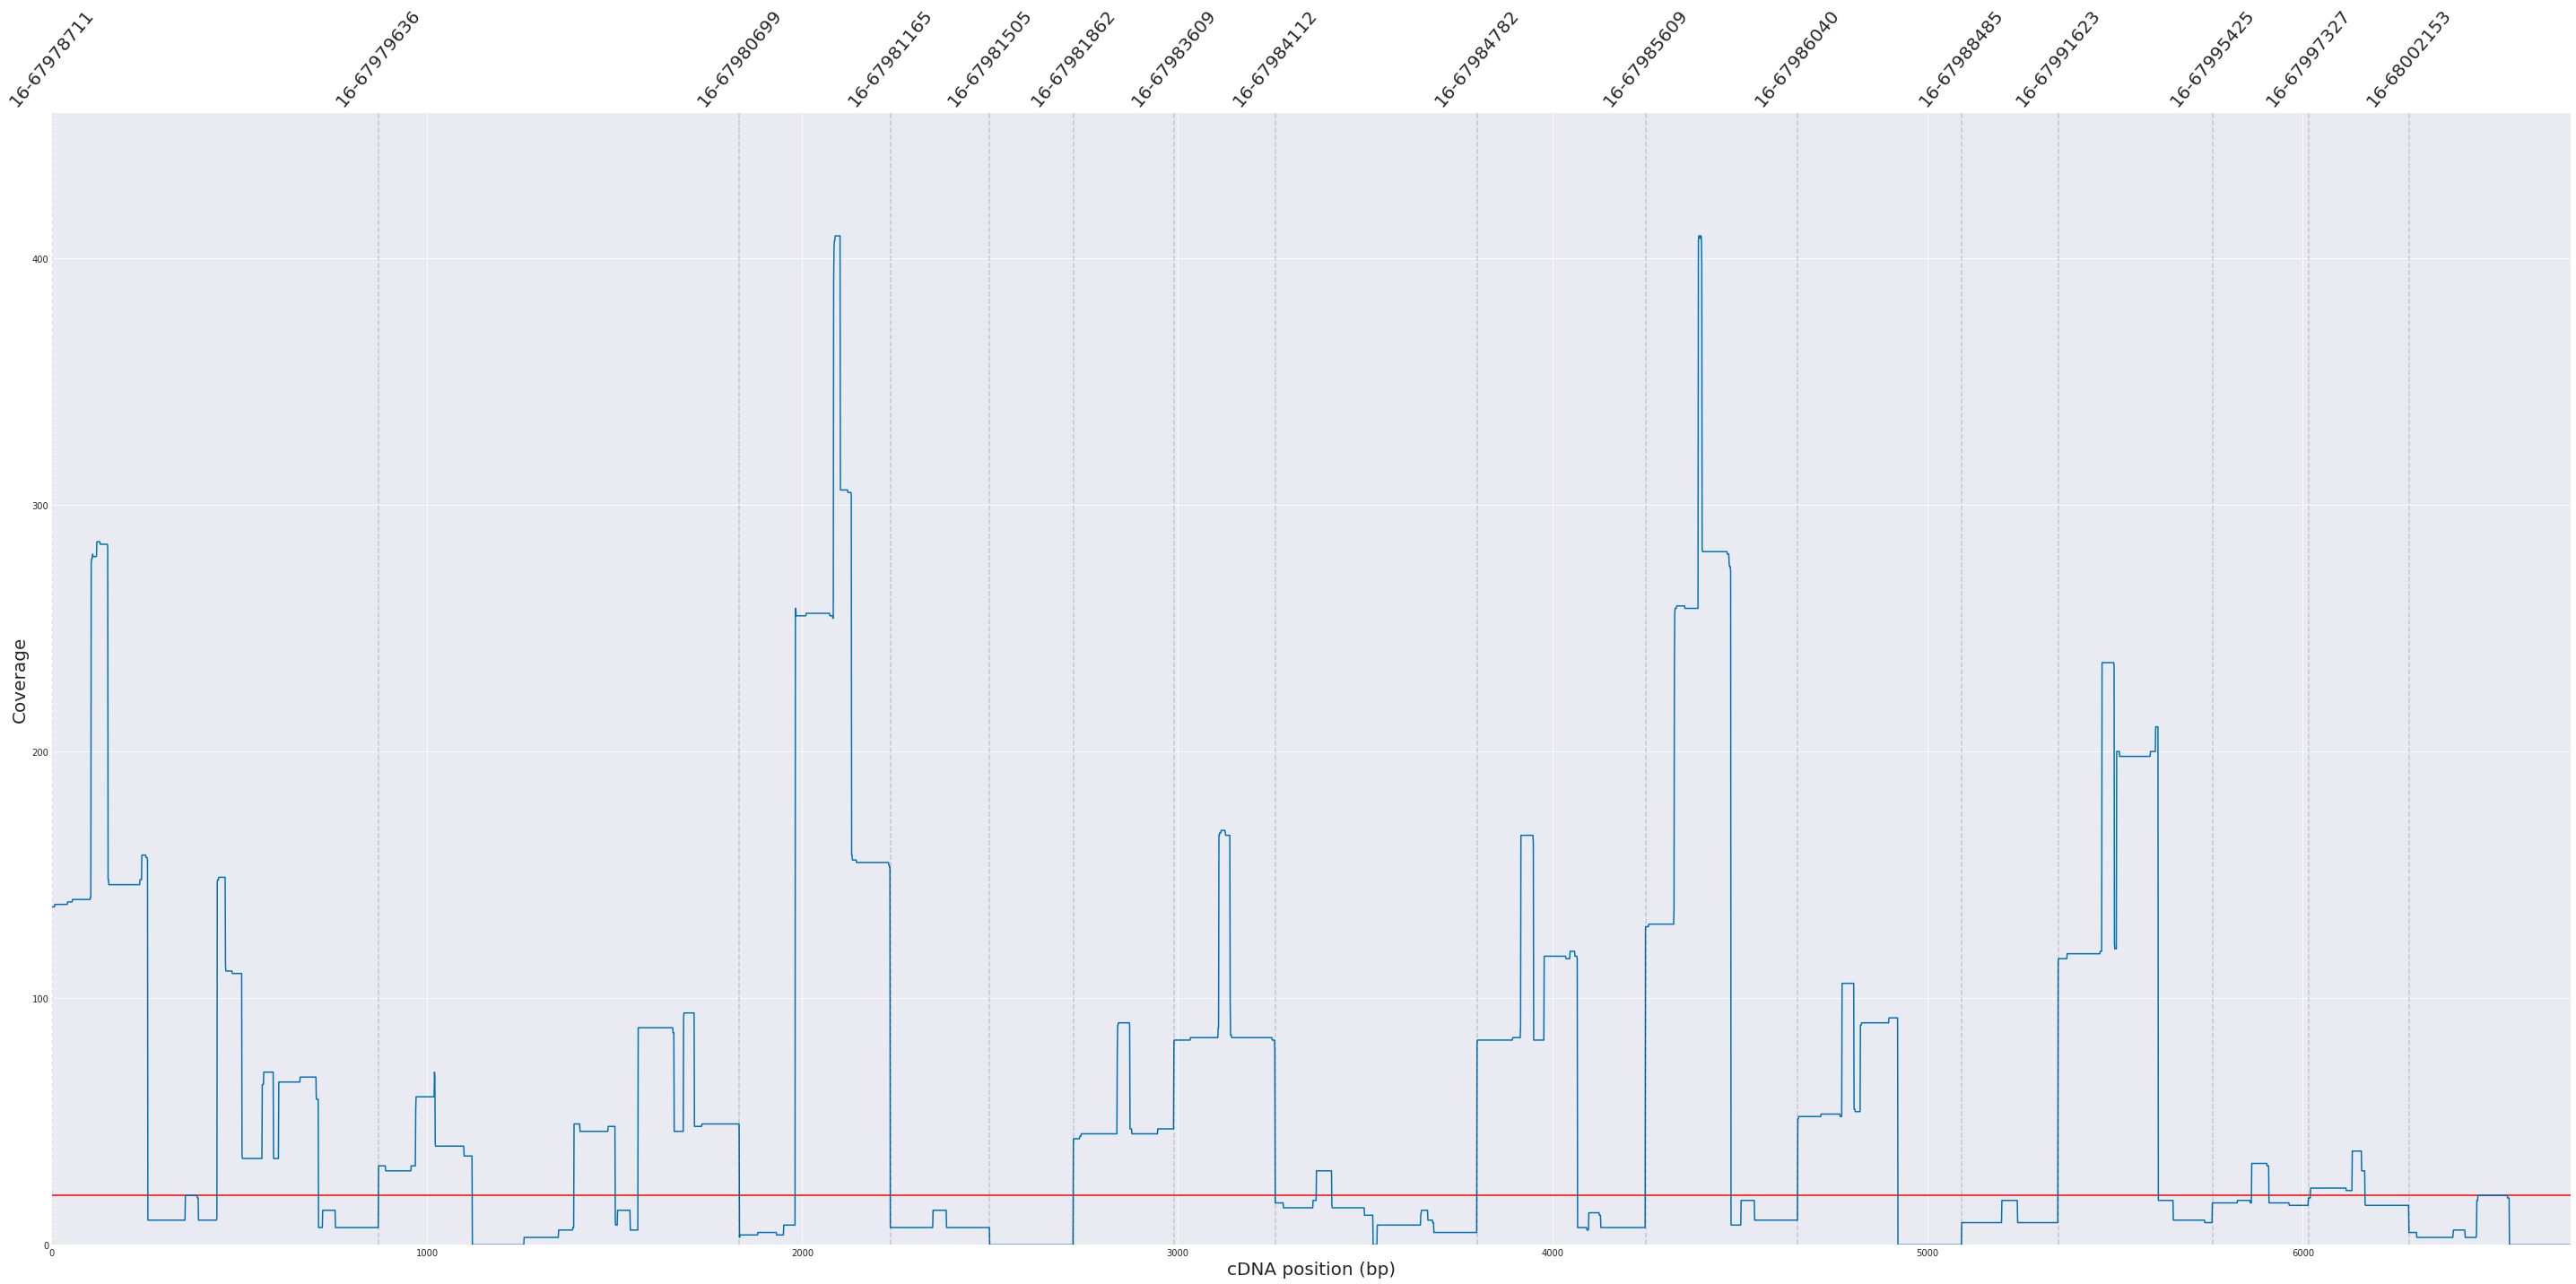

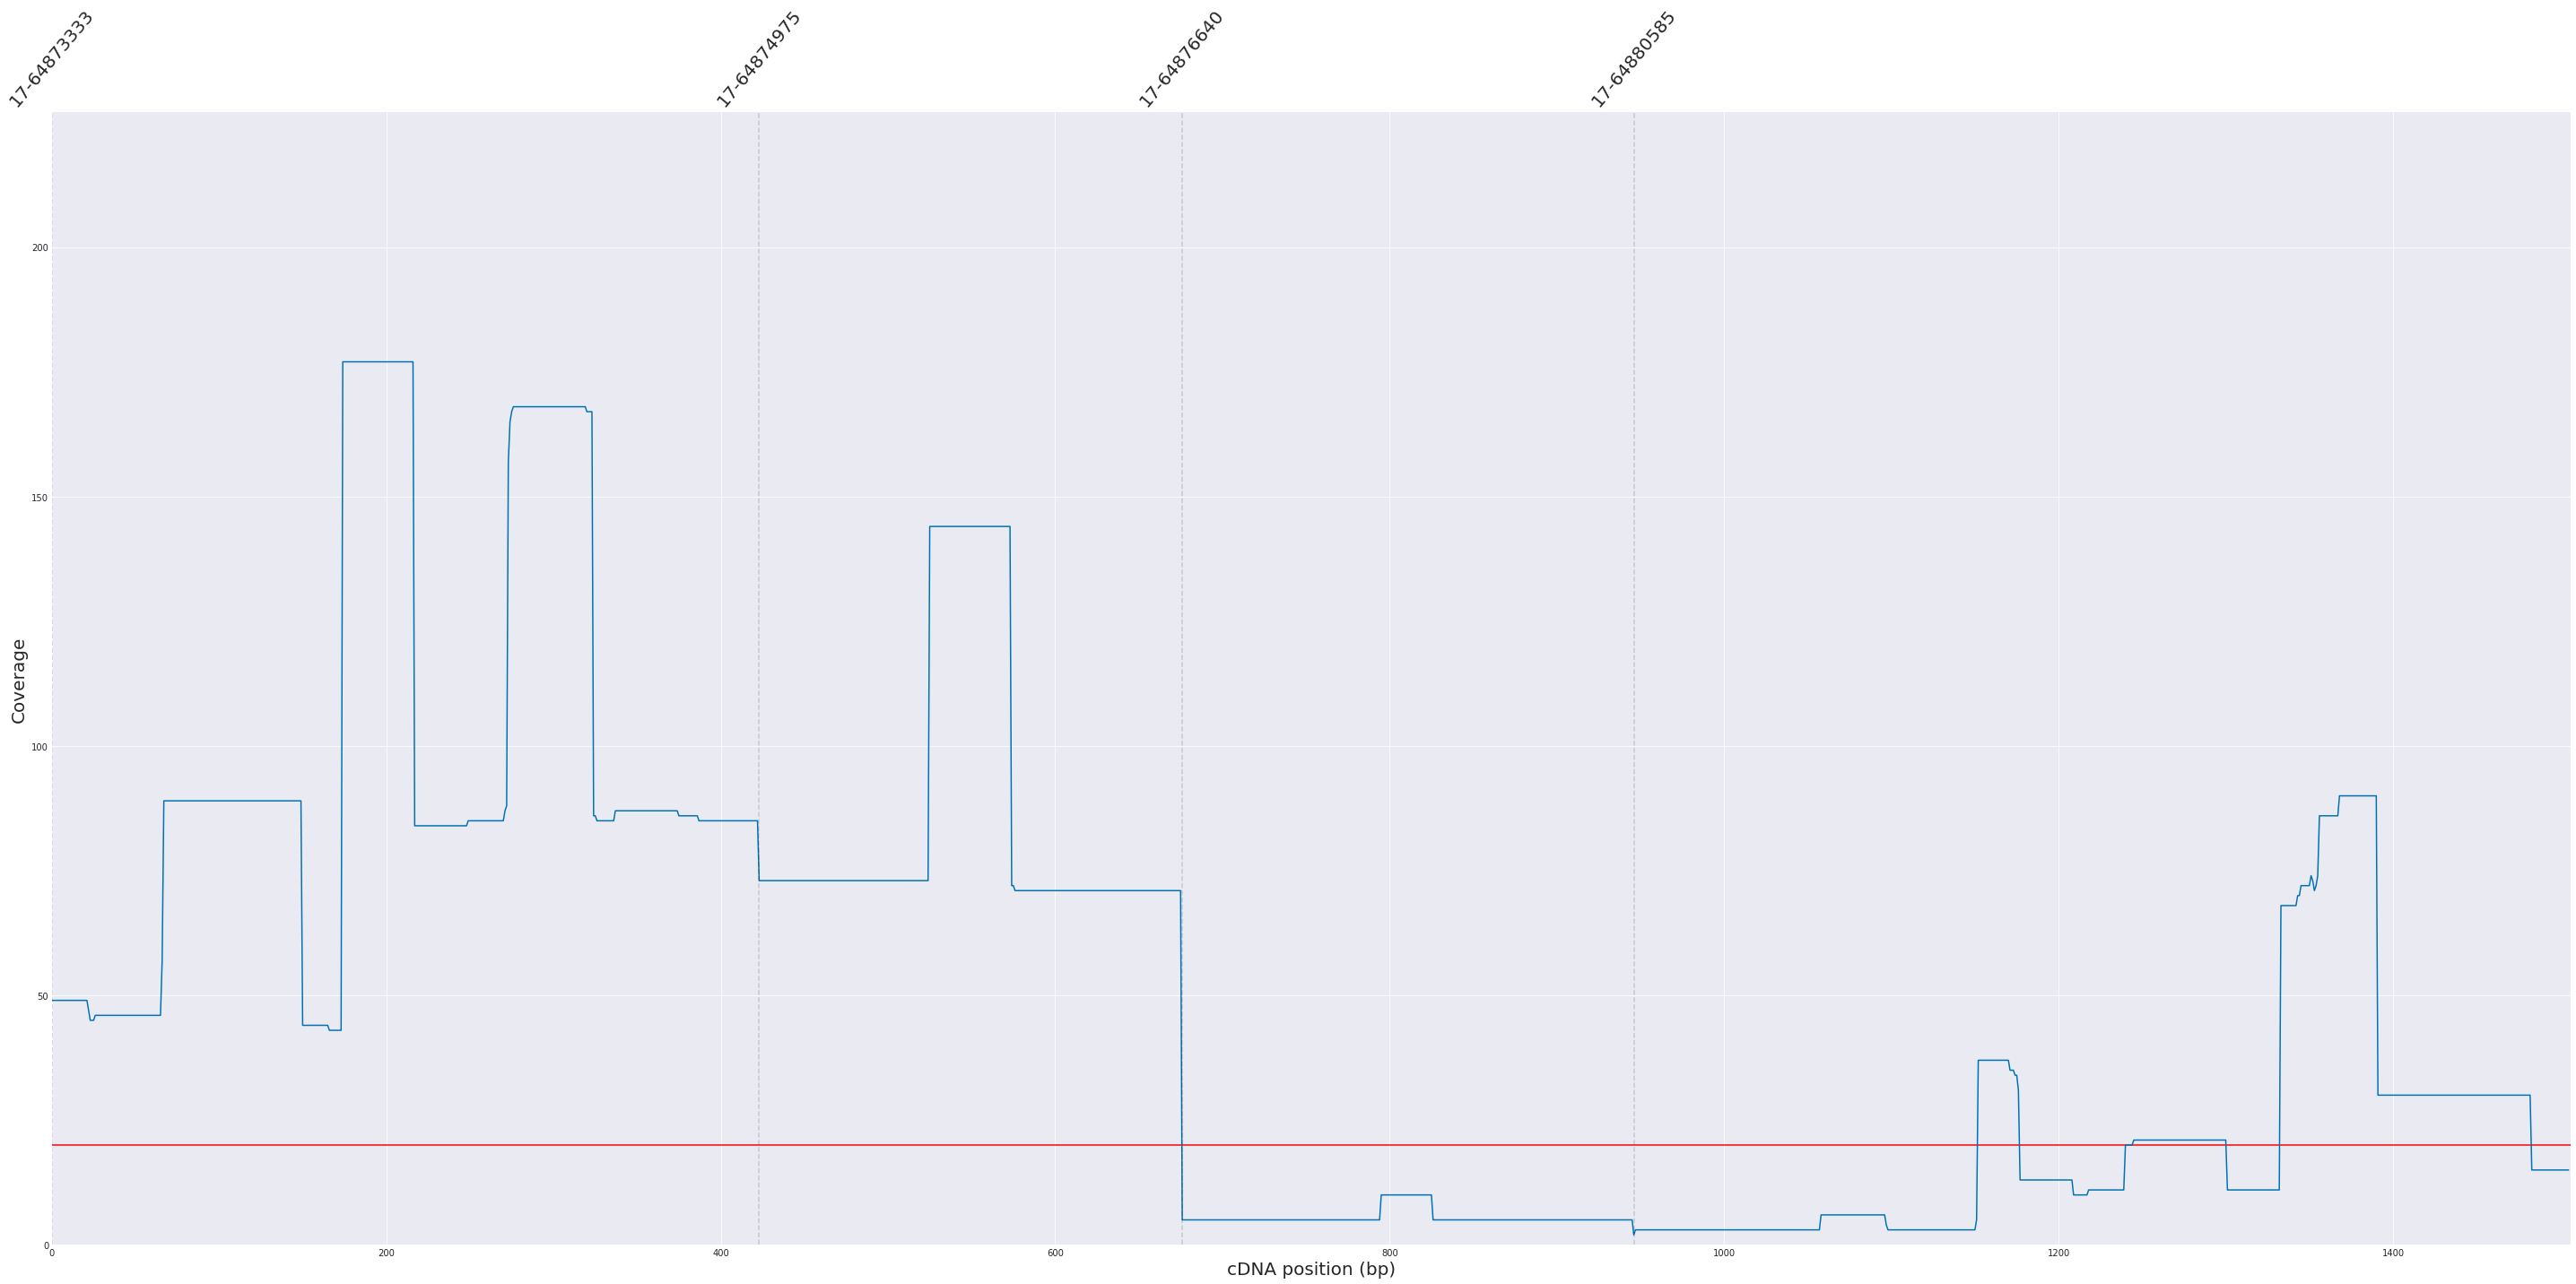

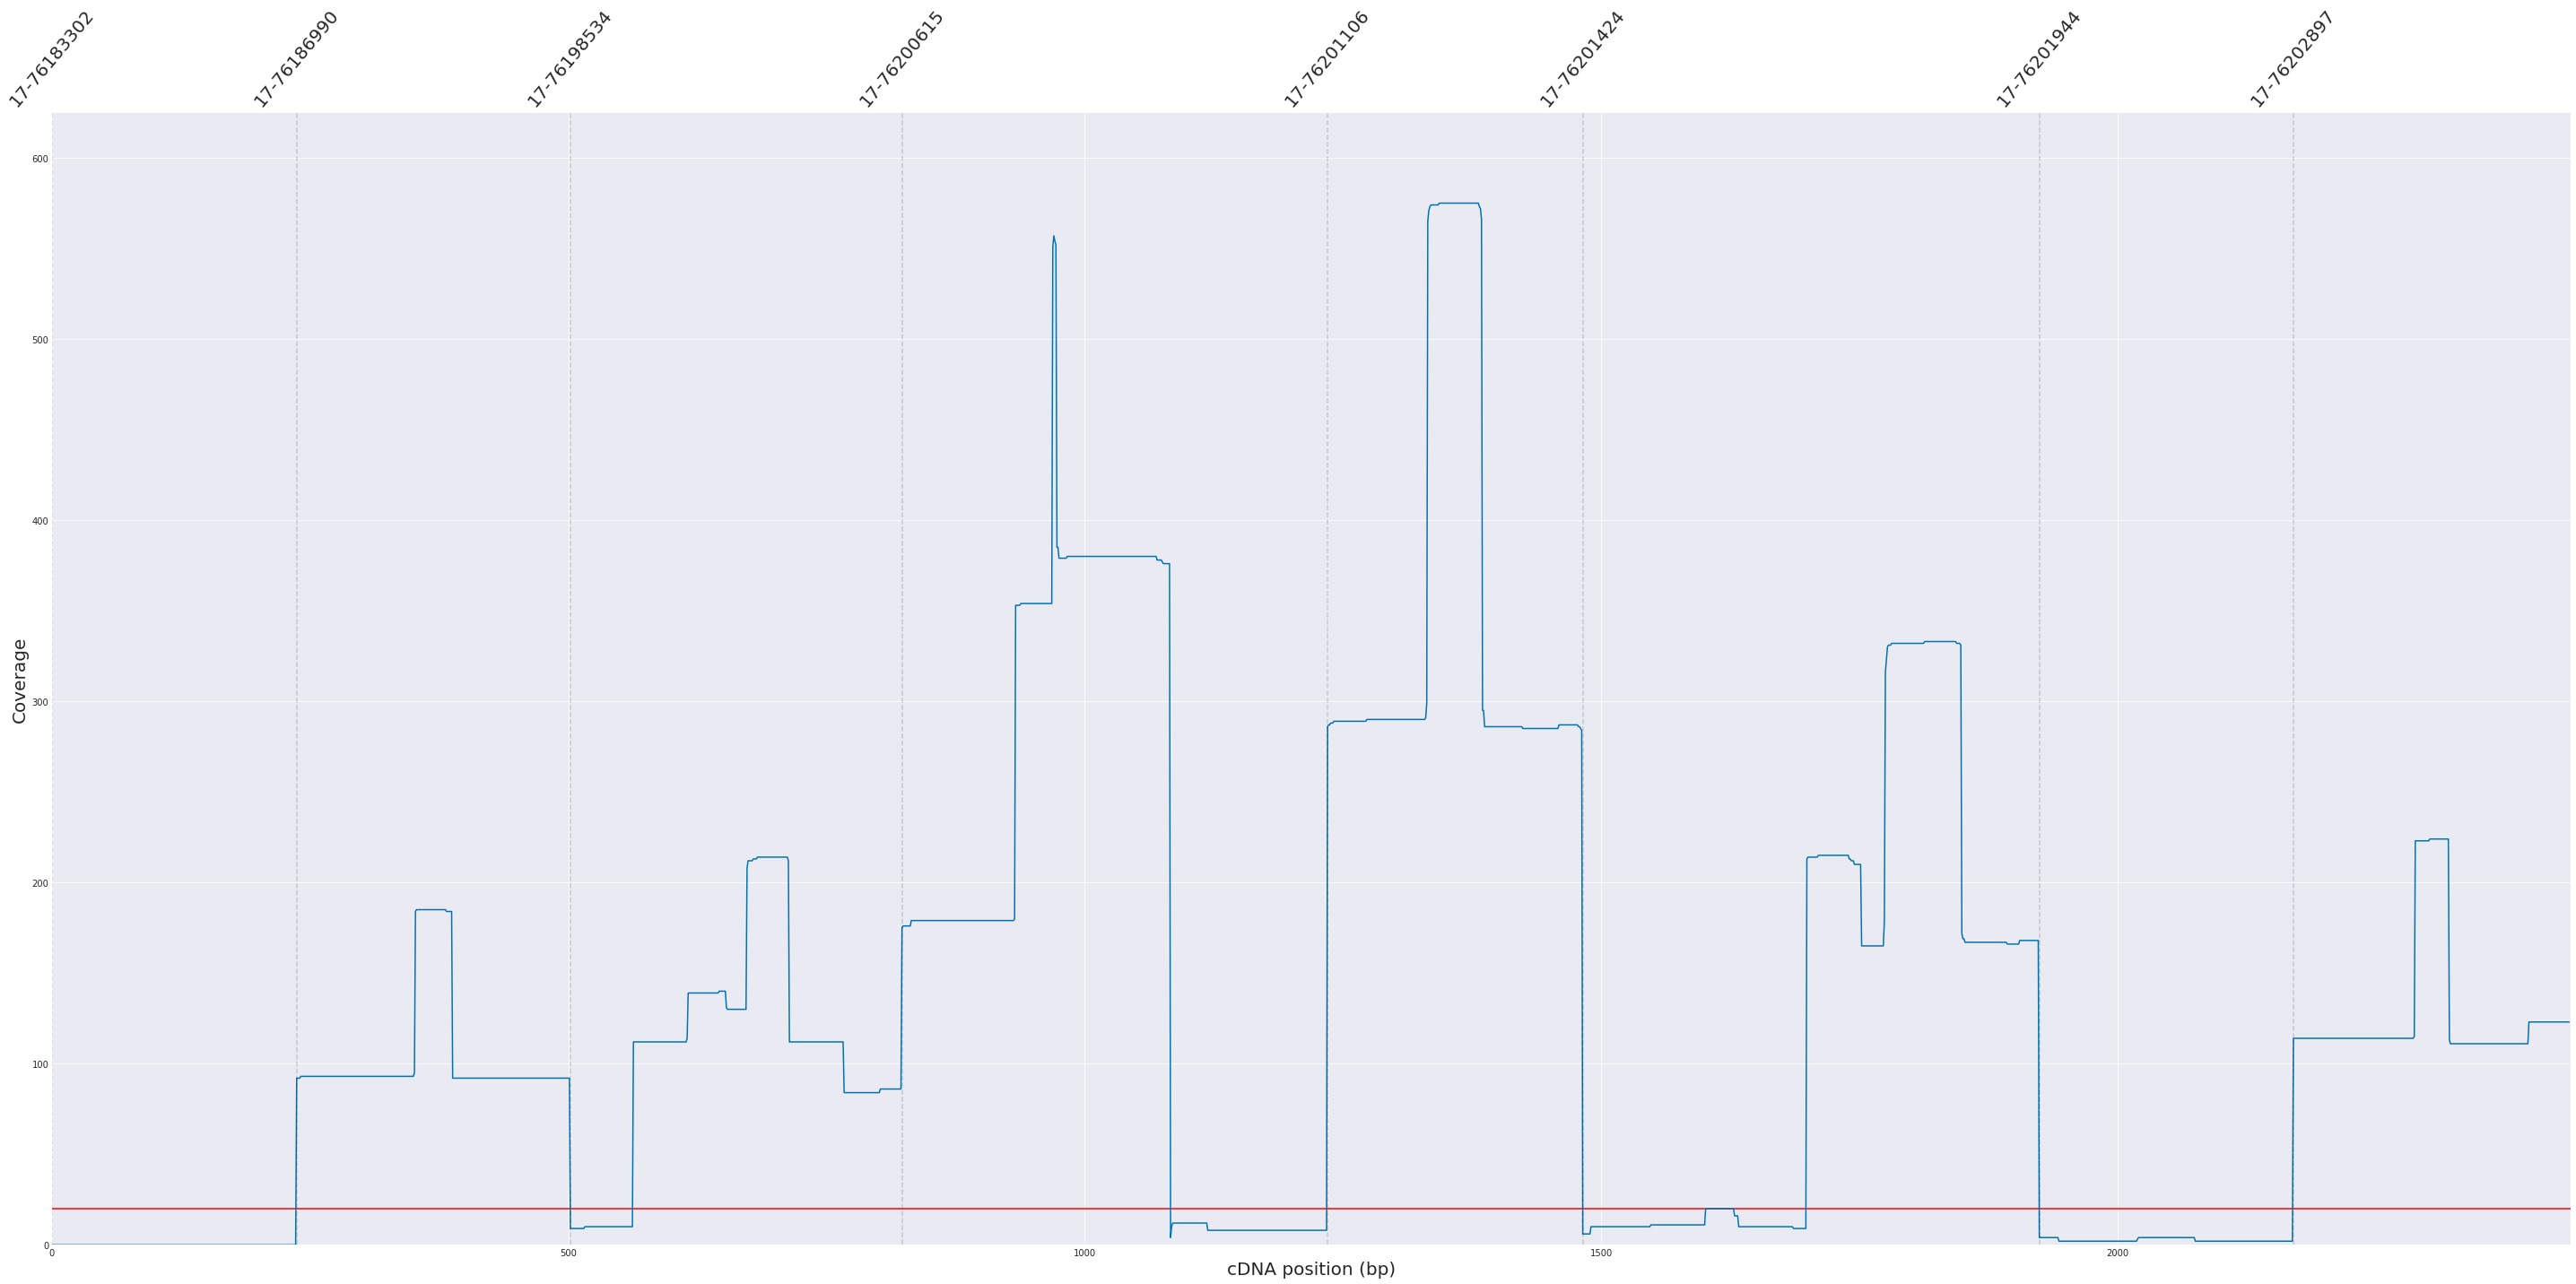

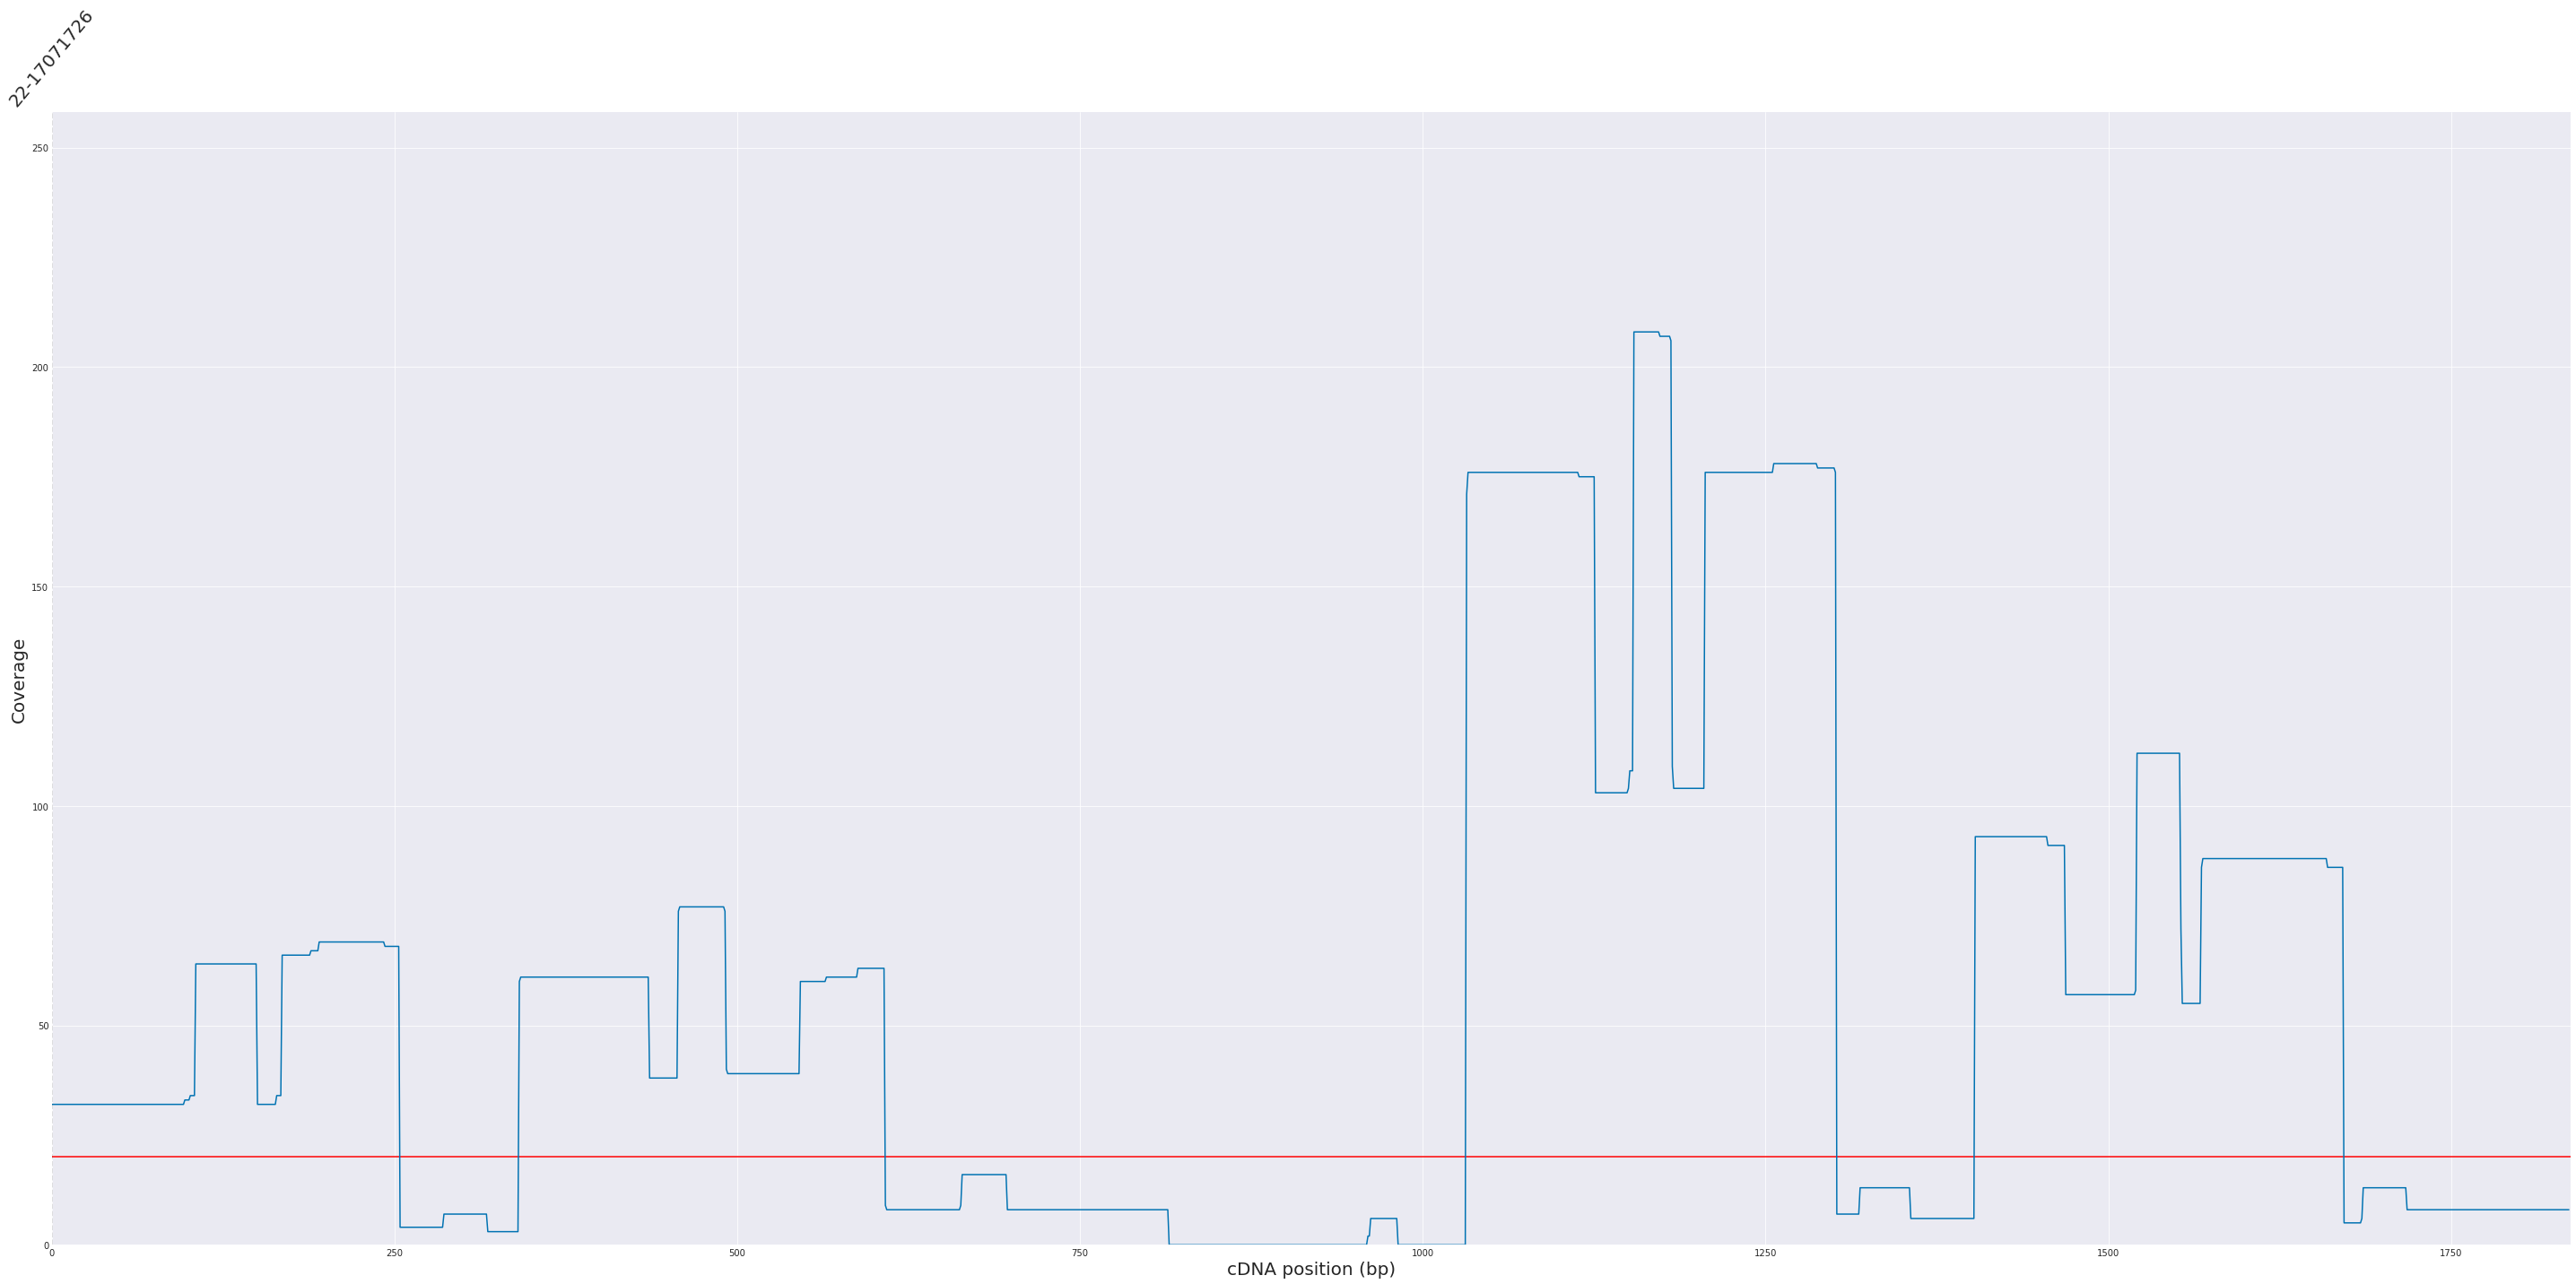

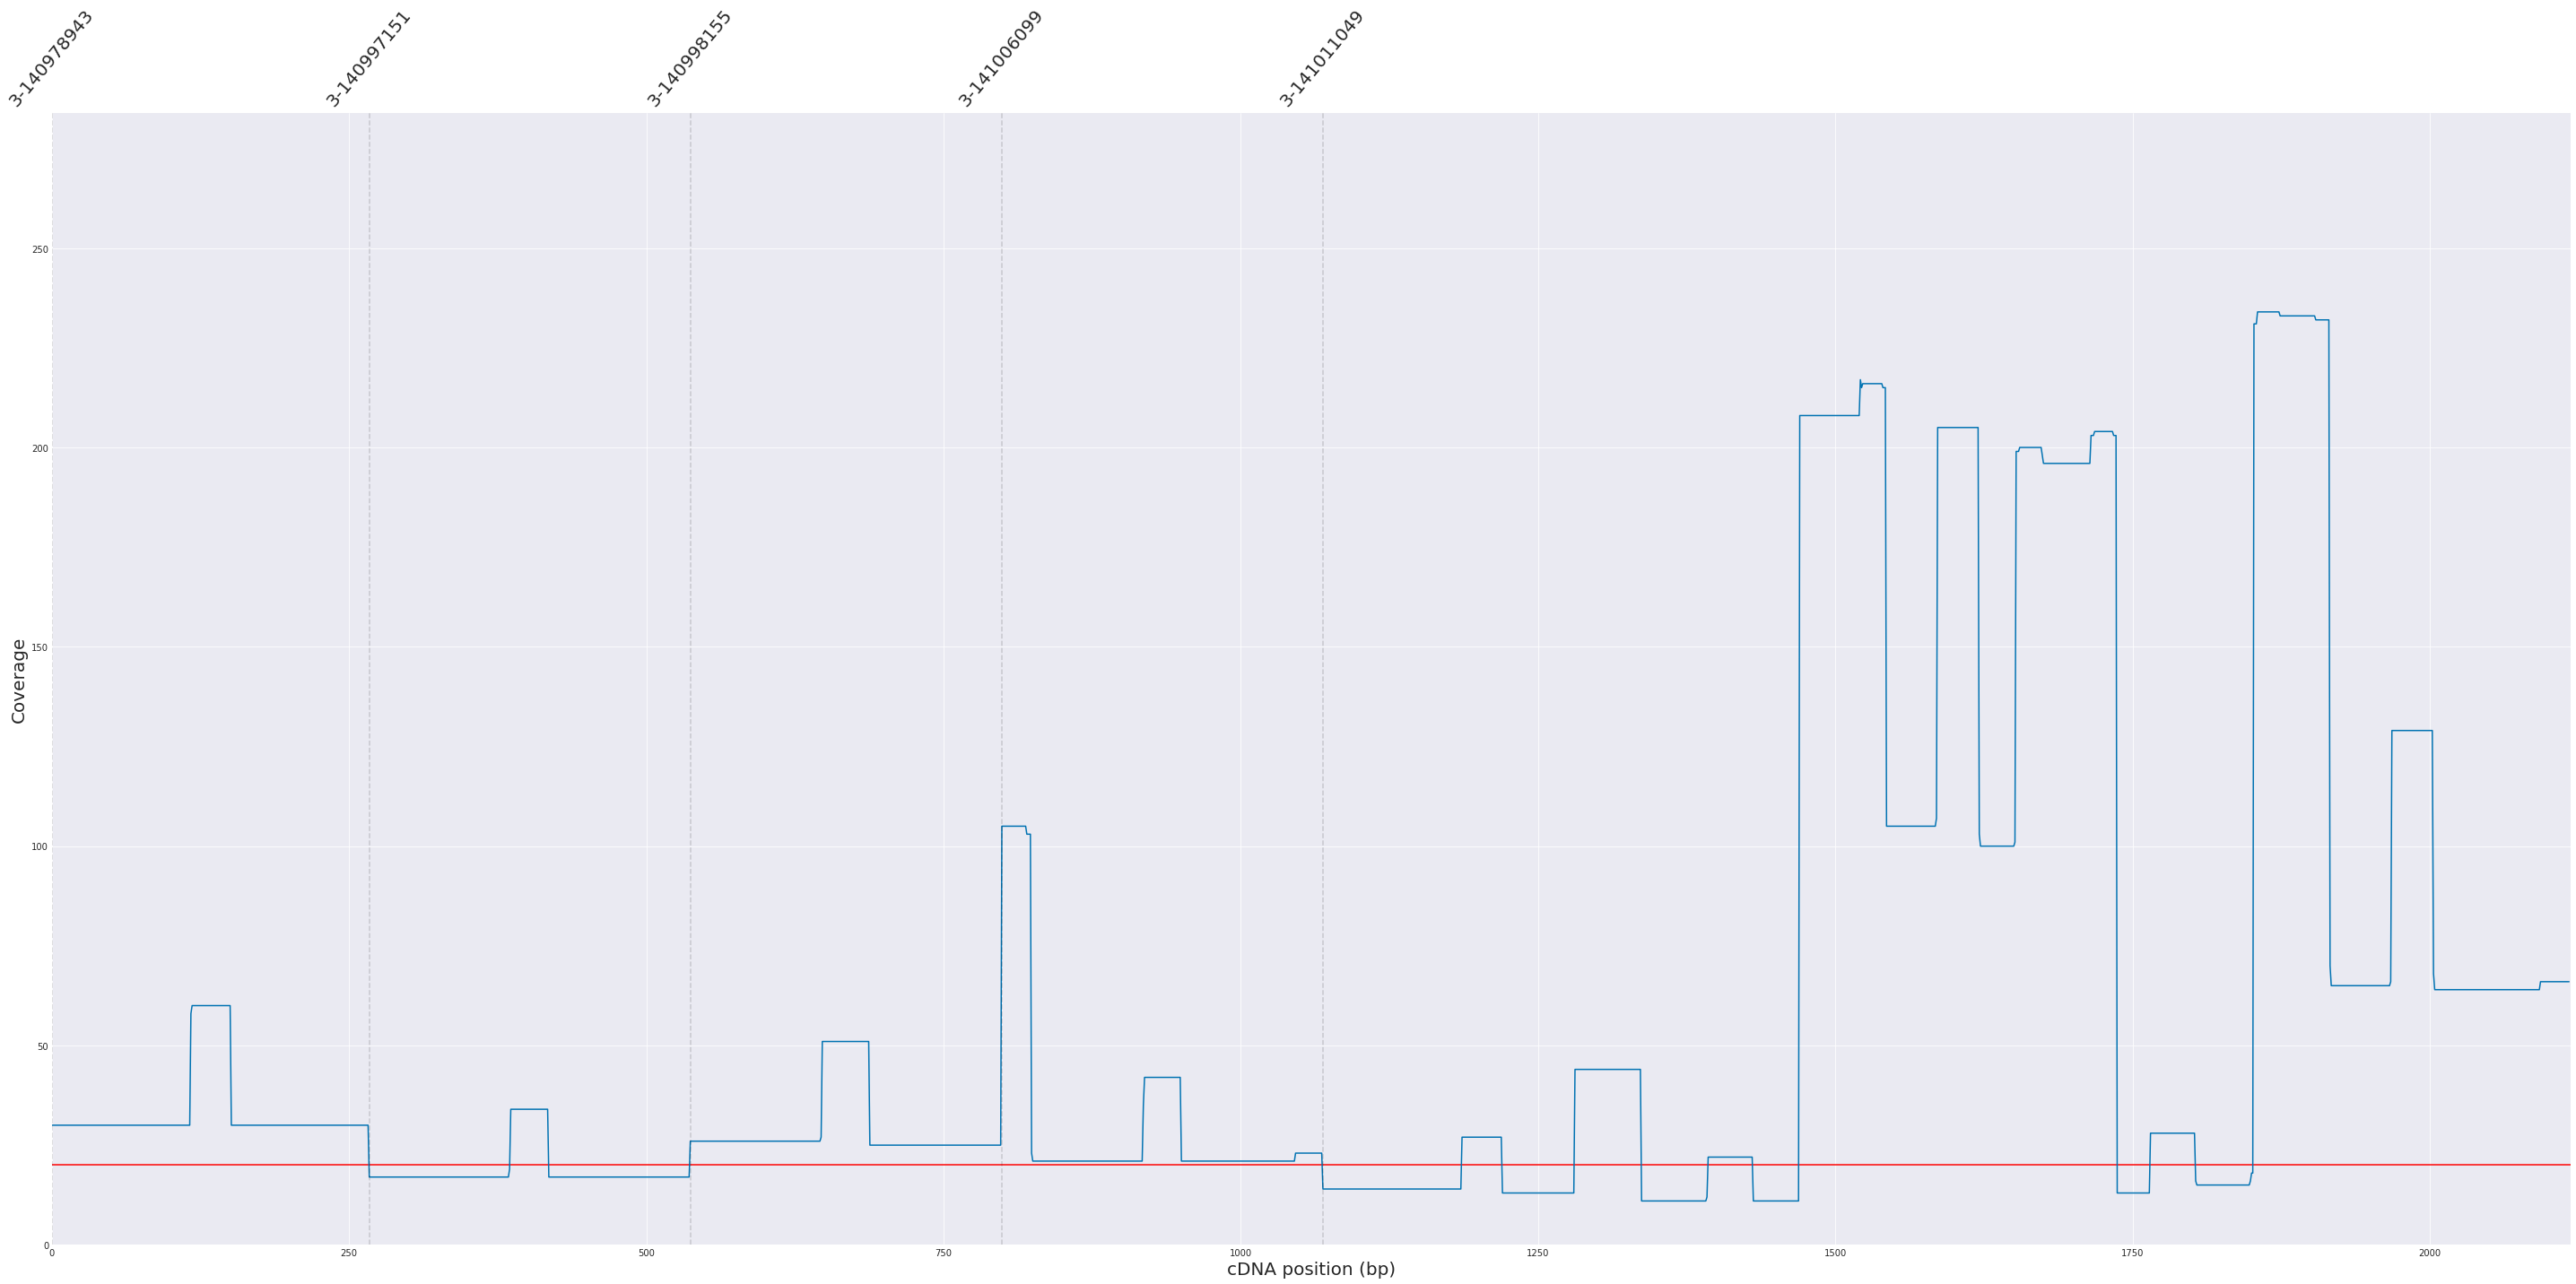

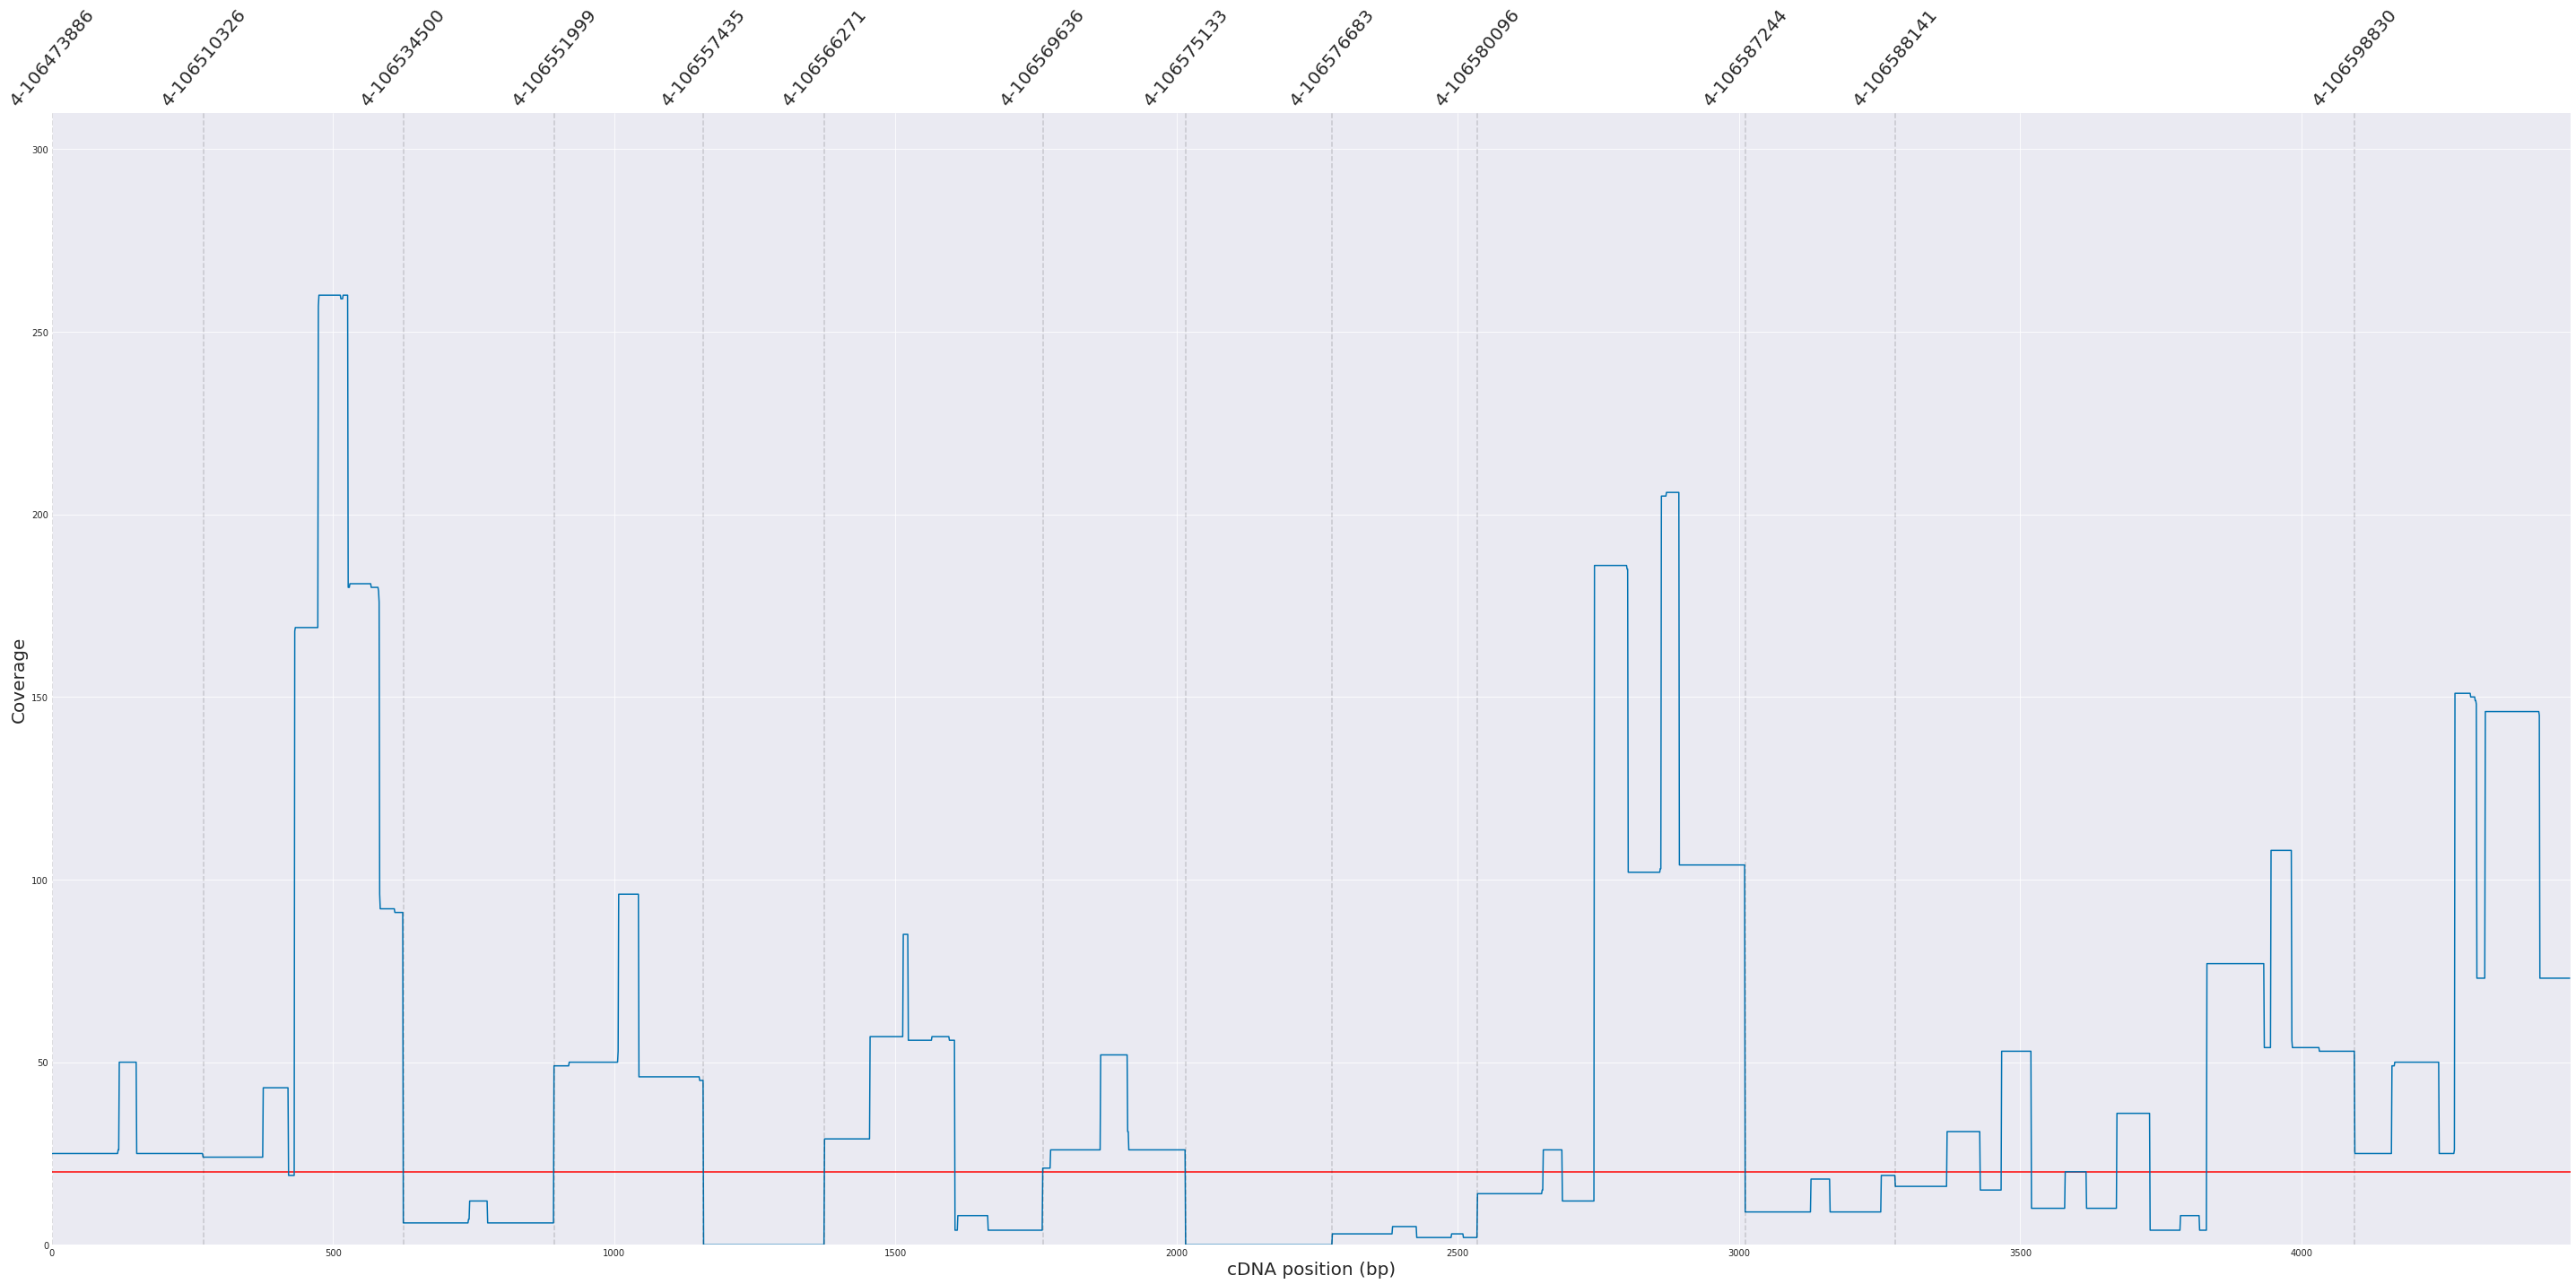

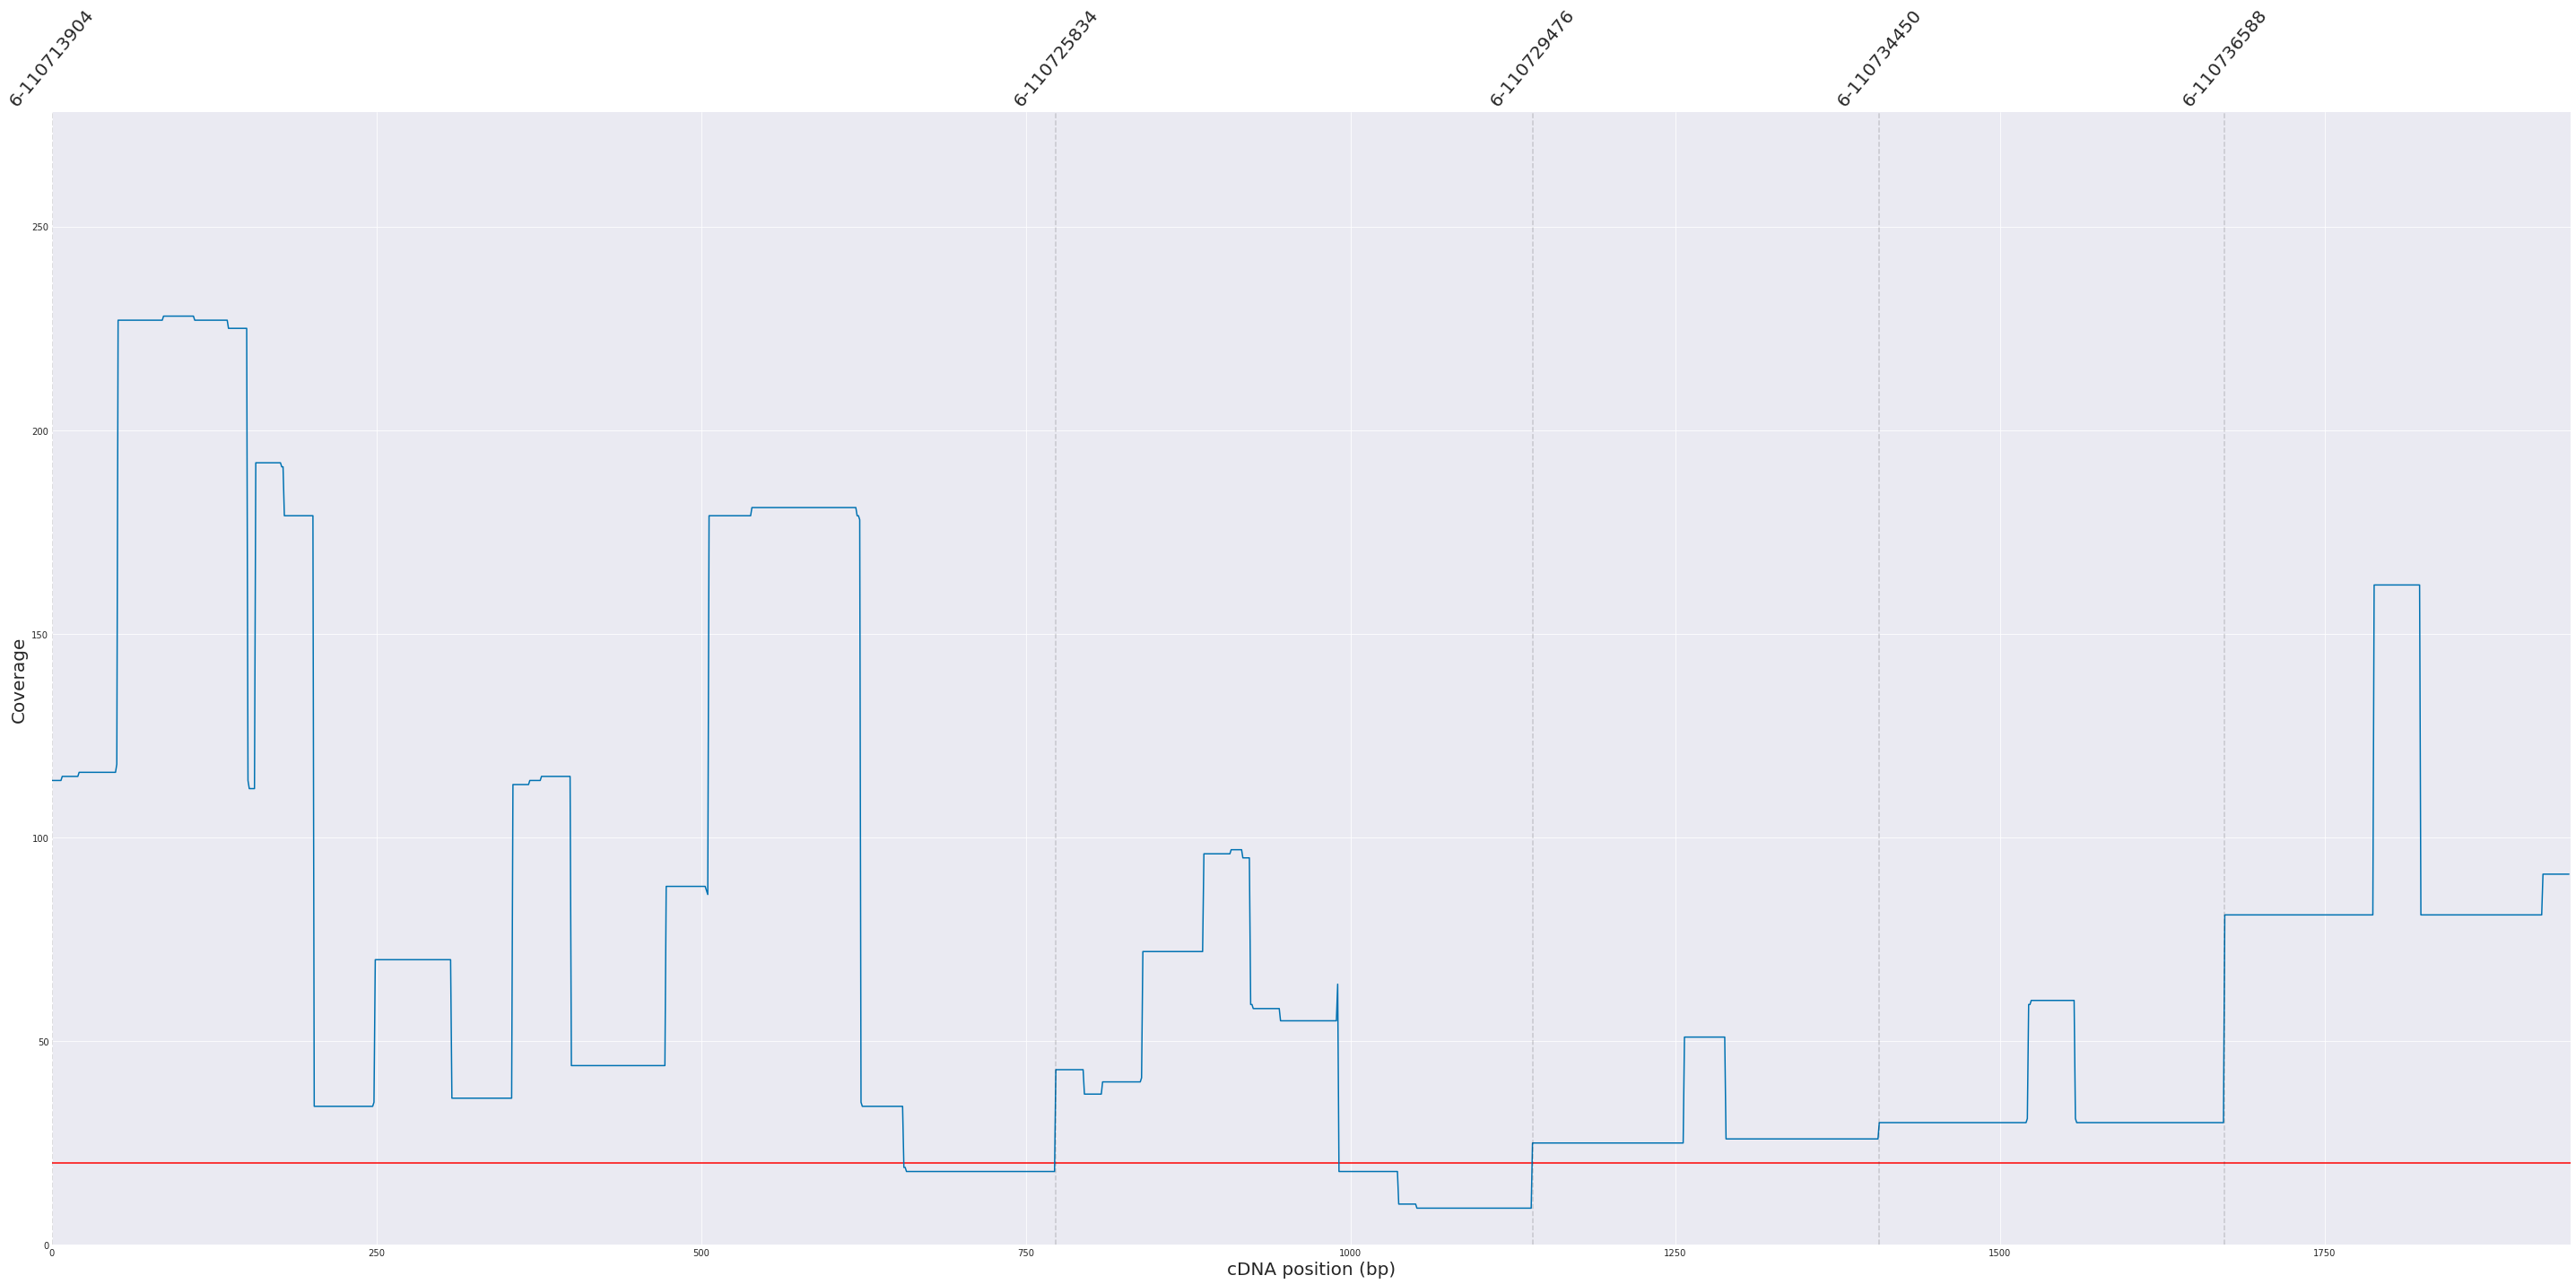

In [7]:
# Create a copy of the dataframe so I dont make changes to the original dataframe
ab = df.copy()

# Create a dataframe per gene
for gene in list(ab.gene.unique()):
    dfg = ab.loc[ab['gene'].map(str) == gene].reset_index(drop=True)
    dfg["index"] = dfg.index

    # Create a plot per gene
    fig = plt.figure(figsize=(40,20))
    ax1 = fig.add_subplot(111)
    ax1.plot(dfg['index'], dfg['sample'], alpha=1)
    # Plot limits
    ax1.set_ylim(0, dfg['sample'].max() + 50)
    ax1.set_xlim(0, dfg['index'].max() + 1)
    ax1.hlines(y=20, xmin=ax1.get_xlim()[0], xmax=ax1.get_xlim()[-1], color='r')

    # Getting positions to plot vertical lines separating exons
    index_positions = []
    names = []
    for exon in list(dfg.feature.unique()):
        index_positions.append(dfg[dfg['feature']==exon].iloc[0]["index"])
        names.append(str(dfg[dfg['feature']==exon].iloc[0]["chr"]) + "-" + 
                     str(dfg[dfg['feature']==exon].iloc[0]["start"]))

    # Set limits for the vertical lines, it is a plot on top of a plot
    ax2 = ax1.twiny()
    ax2.set_ylim(ax1.get_ylim())
    ax2.set_xlim(ax1.get_xlim())

    # Paint vertical lines, we use [1:] because the first point is always zero
    ax2.vlines(x=index_positions, ymin=0, ymax=ax2.get_ylim()[1], linestyle='--', 
               alpha=0.15)
    ax2.grid(b=False)
    ax2.set_xticks(index_positions)
    ax2.set_xticklabels(names, rotation=50, minor=False, fontsize=20)

    ax1.set_xlabel('cDNA position (bp)', fontsize=20)
    ax1.set_ylabel('Coverage', fontsize=20)

    fig.tight_layout()
    figname = "{}_pbcov.png".format(gene)
    fig.savefig(os.path.join("./", figname))
    plt.show()
    plt.close(fig)